In [2]:
import requests
from addict import Dict
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Result = namedtuple('Result', ['wall_time','step','value'])
base_url="http://bigboss:9849/data/plugin/scalars/scalars"

In [4]:
task_names = ("cpu/copy", "associative_recall", "ssmnist/gpu")
model_names = ("128", "128_gem", "128_gem_net2net_256", "128_net2net_256", "256", "256_gem")
metric_names = ("eval_average_accuracy_model_for_curriculum_idx", "train_running_average_accuracy_model_idx_")
levels = tuple(map(str, range(1, 21)))
current_task_metric = "train_running_average_accuracy_model_idx_"
tranfer_metric_name = "eval_average_accuracy_model_for_curriculum_idx"
# tranfer_metric_name = "eval_average_elementwise_accuracy_model_for_curriculum_idx"
model_to_name_dict = {}
# model_to_name_dict["128"] = "128"
model_to_name_dict["256"] = "large"
model_to_name_dict["128_gem_net2net_256"] = "small+gem+net2net"
model_to_name_dict["256_gem"] = "large+gem"
model_to_name_dict["128_net2net_256"] = "small+net2net"
model_to_name_dict["128_gem_net2net"] = "small+gem+net2net"
model_to_name_dict["128_net2net"] = "small+net2net"
# break_index = {
#     "copy": {"128_net2net_256": 11,
#              "128_net2net_256": 11,
#             "128_gem_net2net": }
# }

In [5]:
task = "cpu/copy"
model = "256_gem"
model_names = ("128_gem_net2net_256", "128_net2net_256", "256", "256_gem")
# model_names = ("128_gem_net2net", "128_net2net", "256", "256_gem")
metric = current_task_metric
level = 0
color_map = {
    '128_gem_net2net_256': 'tab:blue',
    '128_gem_net2net': 'tab:blue',
    '128_net2net_256': 'tab:orange',
    '128_net2net': 'tab:orange',
    '256': 'tab:green',
    '256_gem': 'tab:red',
    '128': 'tab:purple', 
    '128_gem': 'tab:brown'
}

In [6]:
def get_result_for_model(task, model, metric, level):
    params = Dict()
    params.run = "{}/{}".format(task, model)
    params.tag = "{}{}".format(metric, level)
    r = requests.get(base_url, params)
    if(r.status_code!=200):
        print(r.url)
#         print("Error")
        return None
    result = list(map(lambda x: Result(*x), r.json()))
    return result

In [7]:
def get_current_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=current_task_metric, level=level)
    if result:
        return result[-1]
    else:
        None

In [8]:
def get_current_performance_for_all_models_all_levels(task):
    current_task_performance = {}
    for m in model_names:
        current_task_performance[m] = {}
        for l in levels:
            res = get_current_task_accuracy(task, m, l)
            if res:
                current_task_performance[m][l] = res
            else:
                break
    return current_task_performance


http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_gem_net2net_256&tag=train_running_average_accuracy_model_idx_1
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net_256&tag=train_running_average_accuracy_model_idx_1
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256&tag=train_running_average_accuracy_model_idx_13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256_gem&tag=train_running_average_accuracy_model_idx_5


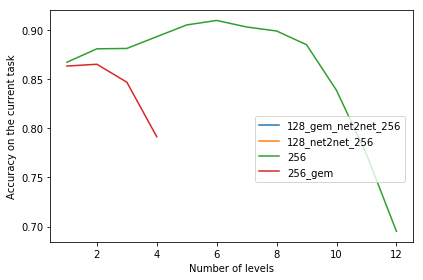

<Figure size 432x288 with 0 Axes>

In [9]:
# def generate_current_accuracy_plots(task):
#     current_task_performance = get_current_performance_for_all_models_all_levels(task)
#     for m in model_names:
#         y = list(map(lambda key_value: key_value[1].value, current_task_performance[m].items()))
#         x = list(range(1, len(y)+1))
#         plt.plot(x, y, label=m, color=color_map[m])
#         plt.xlabel("Number of levels")
#         plt.ylabel("Accuracy on the current task")
    
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0))
#     file_name = "{}_{}".format(task, "current_accuracy")
#     plt.tight_layout()
# #     plt.savefig(file_name)
#     plt.show()
#     plt.clf()


def generate_current_accuracy_plots(task):
    
    current_task_performance = get_current_performance_for_all_models_all_levels(task)
#     for m in ["128", "128_gem"]:
#         if(not current_task_performance[m]):
#             new_key = m+"_net2net"
#             data_to_search_index_from = list(map(lambda x: x.step, current_task_performance[new_key].values()))
#             print(data_to_search_index_from)
#             index = [_index for _index in enumerate(data_to_search_index_from) if data_to_search_index_from[_index] > 30000  ]
#             print(index)
#             current_task_performance
    
    for m in model_names:
        y = list(map(lambda key_value: key_value[1].value, current_task_performance[m].items()))
        x = list(range(1, len(y)+1))
        plt.plot(x, y, label=m, color=color_map[m])
        plt.xlabel("Number of levels")
        plt.ylabel("Accuracy on the current task")
    
    plt.legend(loc='center left', bbox_to_anchor=(0.55, 0.4))
#     plt.legend(loc='center left')
    file_name = "{}_{}".format(task, "current_accuracy")
    plt.tight_layout()
    plt.savefig("ssmnist_current_acc")
    plt.show()
    plt.clf()

generate_current_accuracy_plots("cpu/ssmnist")

In [10]:
current_task_performance = get_current_performance_for_all_models_all_levels(task="cpu/ssmnist")

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_gem_net2net_256&tag=train_running_average_accuracy_model_idx_1
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net_256&tag=train_running_average_accuracy_model_idx_1
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256&tag=train_running_average_accuracy_model_idx_13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256_gem&tag=train_running_average_accuracy_model_idx_5


In [11]:
current_task_performance

{'128_gem_net2net_256': {},
 '128_net2net_256': {},
 '256': {'1': Result(wall_time=1535936017.543133, step=9991, value=0.8671860098838806),
  '2': Result(wall_time=1535941820.261984, step=9991, value=0.8808364272117615),
  '3': Result(wall_time=1535948092.3536637, step=9991, value=0.8812102675437927),
  '4': Result(wall_time=1535955009.9870167, step=9991, value=0.8932003378868103),
  '5': Result(wall_time=1535963018.677508, step=9991, value=0.9051353335380554),
  '6': Result(wall_time=1535972658.2682214, step=9991, value=0.9097015261650085),
  '7': Result(wall_time=1535983255.532326, step=9991, value=0.9030433893203735),
  '8': Result(wall_time=1535994601.1864934, step=9991, value=0.8989726305007935),
  '9': Result(wall_time=1536006585.0203483, step=9991, value=0.884975016117096),
  '10': Result(wall_time=1536019437.2930171, step=9991, value=0.8385957479476929),
  '11': Result(wall_time=1536033344.998653, step=9991, value=0.7736378908157349),
  '12': Result(wall_time=1536048312.3819826

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=train_running_average_accuracy_model_idx_11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=train_running_average_accuracy_model_idx_14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=train_running_average_accuracy_model_idx_13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=train_running_average_accuracy_model_idx_10


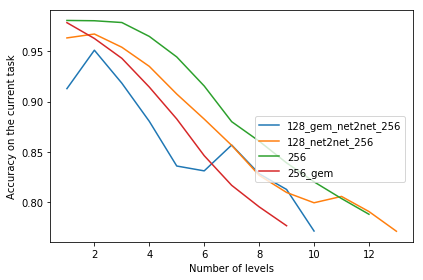

<Figure size 432x288 with 0 Axes>

In [12]:
# for task in task_names:
# #     task = "copy"?
#     generate_current_accuracy_plots(task)
generate_current_accuracy_plots(task="cpu/copy")

In [13]:
# task = "associative_recall"

# generate_current_accuracy_plots(task)

In [14]:
def get_previous_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=current_task_metric, level=level)
    if result:
        return result
    else:
        None

In [15]:
current_task_performance = get_current_performance_for_all_models_all_levels(task)

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=train_running_average_accuracy_model_idx_11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=train_running_average_accuracy_model_idx_14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=train_running_average_accuracy_model_idx_13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=train_running_average_accuracy_model_idx_10


In [16]:
# current_task_performance["128"]

In [17]:
def get_previous_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[0:level]
    else:
        None

In [18]:
def get_previous_performance_for_all_models_all_levels(task):
    previous_task_performance = {}
    for m in model_names:
        previous_task_performance[m] = {}
        for l in levels:
            res = get_previous_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                previous_task_performance[m][l] = average_res
            else:
                break
    return previous_task_performance


In [19]:
# def generate_previous_accuracy_plots(task):
#     previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
#     for m in model_names:
#         if(previous_task_performance[m]):
#             y = list(map(lambda key_value: key_value[1], previous_task_performance[m].items()))
#             x = list(range(1, len(y)+1))
#             plt.xlim(0, 15)
#             plt.ylim(0, 1)
#             plt.bar(x, y, label=m)
#             plt.xlabel("Number of levels")
#             plt.ylabel("Average accuracy on the previous tasks")
#             plt.legend(loc='center left', bbox_to_anchor=(1, 0))
# #             plt.show()
#             file_name = "{}_{}_{}".format(m, task, "previous_accuracy")
#             plt.tight_layout()
#             plt.savefig(file_name)
#             plt.clf()

In [20]:
previous_task_performance = get_previous_performance_for_all_models_all_levels(task="cpu/copy")

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=eval_average_accuracy_model_for_curriculum_idx10


In [21]:
previous_task_performance

{'128_gem_net2net_256': {'1': 0.8647083044052124,
  '2': 0.8781076371669769,
  '3': 0.8794653018315634,
  '4': 0.8641739636659622,
  '5': 0.8495672225952149,
  '6': 0.8124716281890869,
  '7': 0.7991822702544076,
  '8': 0.7926108911633492,
  '9': 0.7848359677526686,
  '10': 0.772234457731247},
 '128_net2net_256': {'1': 0.5948333144187927,
  '2': 0.5859479308128357,
  '3': 0.5688113371531168,
  '4': 0.5547953248023987,
  '5': 0.561234450340271,
  '6': 0.5695293545722961,
  '7': 0.5705362813813346,
  '8': 0.5761896818876266,
  '9': 0.5845756332079569,
  '10': 0.5976998388767243,
  '11': 0.5926923264156688,
  '12': 0.5831430181860924,
  '13': 0.6205941301125747},
 '256': {'1': 0.5817916393280029,
  '2': 0.5349236130714417,
  '3': 0.5283147990703583,
  '4': 0.5237626656889915,
  '5': 0.5207601547241211,
  '6': 0.5141214976708094,
  '7': 0.5469782395022256,
  '8': 0.5545686855912209,
  '9': 0.5516620841291215,
  '10': 0.5693736732006073,
  '11': 0.5640079189430584,
  '12': 0.5649736945827802

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=eval_average_accuracy_model_for_curriculum_idx10
sum_256_gem_cpu_copy_previous_accuracy


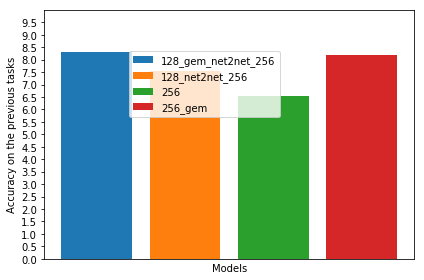

In [22]:
def generate_previous_accuracy_plots(task):
    previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = False
    
    for m in model_names:
        
        if(previous_task_performance[m]):
            if(use_mean):
                f = np.mean
            else:
                f = np.sum
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], previous_task_performance[m].items())))))
            x.append(m)
    if(use_mean):
        plt.ylim(0, 1)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        curr_ax.bar(idx, _y, label=_x, align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.65, 0.55))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    plt.ylim(0.0, 10)
    
    plt.yticks(np.arange(0.0, 10.0, 0.5))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the previous tasks")
    plt.tight_layout()
    
    print(file_name)
    plt.savefig("prev_copy_alt")
#     plt.clf()
generate_previous_accuracy_plots(task="cpu/copy")

In [23]:
# for task in task_names:
#     generate_previous_accuracy_plots(task)
# generate_previous_accuracy_plots(task)

In [24]:
# previous_task_performance = get_previous_performance_for_all_models_all_levels(task="c")

In [25]:
previous_task_performance

{'128_gem_net2net_256': {'1': 0.8647083044052124,
  '2': 0.8781076371669769,
  '3': 0.8794653018315634,
  '4': 0.8641739636659622,
  '5': 0.8495672225952149,
  '6': 0.8124716281890869,
  '7': 0.7991822702544076,
  '8': 0.7926108911633492,
  '9': 0.7848359677526686,
  '10': 0.772234457731247},
 '128_net2net_256': {'1': 0.5948333144187927,
  '2': 0.5859479308128357,
  '3': 0.5688113371531168,
  '4': 0.5547953248023987,
  '5': 0.561234450340271,
  '6': 0.5695293545722961,
  '7': 0.5705362813813346,
  '8': 0.5761896818876266,
  '9': 0.5845756332079569,
  '10': 0.5976998388767243,
  '11': 0.5926923264156688,
  '12': 0.5831430181860924,
  '13': 0.6205941301125747},
 '256': {'1': 0.5817916393280029,
  '2': 0.5349236130714417,
  '3': 0.5283147990703583,
  '4': 0.5237626656889915,
  '5': 0.5207601547241211,
  '6': 0.5141214976708094,
  '7': 0.5469782395022256,
  '8': 0.5545686855912209,
  '9': 0.5516620841291215,
  '10': 0.5693736732006073,
  '11': 0.5640079189430584,
  '12': 0.5649736945827802

In [26]:
# generate_previous_accuracy_plots(task="associative_recall")

In [27]:
def get_future_task_accuracy(task, model, level):
    result = get_result_for_model(task, model, metric=tranfer_metric_name, level=level)
    if result:
        return result[level+1:20]
    else:
        None

In [28]:
def get_future_performance_for_all_models_all_levels(task):
    future_task_performance = {}
    for m in model_names:
        future_task_performance[m] = {}
        for l in levels:
            res = get_future_task_accuracy(task, m, int(l))
            if res:
                average_res = np.mean(np.asarray(list(map(lambda x: x.value, res))))
                future_task_performance[m][l] = average_res
            else:
                break
    return future_task_performance


http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx1
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx1
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F256_gem&tag=eval_average_accuracy_model_for_curriculum_idx5
sum_256_gem_cpu_ssmnist_previous_accuracy
[0.0, 0.0]


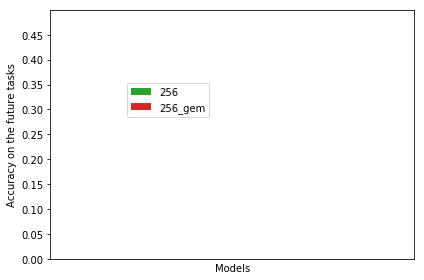

In [29]:
def generate_future_accuracy_plots(task):
    future_task_performance = get_future_performance_for_all_models_all_levels(task)
    y = []
    x = []
    fig, ax = plt.subplots(1, 1)
    curr_ax = ax
    use_mean = True
    
#     model_names = ("128_net2net_256", "256", "128_gem_net2net_256", "256_gem")
    
    for m in model_names:
        
        if(future_task_performance[m]):
            if(use_mean):
                f = np.mean
            else:
                f = np.sum
            y.append(f(np.asarray(list(map(lambda key_value: key_value[1], future_task_performance[m].items())))))
            x.append(m)
    if(use_mean):
        plt.ylim(0.5, 0.7)
    else:
        plt.ylim(0, 15)
        
    for idx, (_x, _y) in enumerate(zip(x, y)):
        curr_ax.bar(idx, _y, label=_x, align="center", color = color_map[_x])
    
    plt.legend(loc='lower right', bbox_to_anchor=(0.45, 0.55))
    file_name = "sum_{}_{}_{}".format(m, "_".join(task.split("/")), "previous_accuracy")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    )
    plt.ylim(0.0, 0.5)
    
    plt.yticks(np.arange(0.0, 0.5, 0.05))
    plt.xlabel("Models")
    plt.ylabel("Accuracy on the future tasks")
    plt.tight_layout()
    
    print(file_name)
    plt.savefig("next_ssmnist_alt")
    print(y)
#     plt.clf()
generate_future_accuracy_plots(task="cpu/ssmnist")

In [30]:
future_task_performance = get_future_performance_for_all_models_all_levels(task)

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=eval_average_accuracy_model_for_curriculum_idx10


In [31]:
future_task_performance

{'128_gem_net2net_256': {'1': 0.532785263326433,
  '2': 0.5475716643473681,
  '3': 0.5708463042974472,
  '4': 0.5947526017824809,
  '5': 0.616467182125364,
  '6': 0.641972922361814,
  '7': 0.6497636983791987,
  '8': 0.6506746898997914,
  '9': 0.6576688885688782,
  '10': 0.6579691304100884},
 '128_net2net_256': {'1': 0.4827217956384023,
  '2': 0.47185954100945415,
  '3': 0.5092509761452675,
  '4': 0.5150531649589538,
  '5': 0.5270644341196332,
  '6': 0.5541867407468649,
  '7': 0.5702552869915962,
  '8': 0.5862613049420443,
  '9': 0.5982209980487824,
  '10': 0.6907972693443298,
  '11': 0.6910824626684189,
  '12': 0.6952852862221854,
  '13': 0.6916169126828512},
 '256': {'1': 0.5326248639159732,
  '2': 0.534528606078204,
  '3': 0.5033656824380159,
  '4': 0.5329161743323009,
  '5': 0.530193247965404,
  '6': 0.5319123795399299,
  '7': 0.554539737602075,
  '8': 0.5745035193183206,
  '9': 0.6216485977172852,
  '10': 0.6306756138801575,
  '11': 0.6409363076090813,
  '12': 0.6502572298049927},


http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=eval_average_accuracy_model_for_curriculum_idx10
sum_256_gem_cpu_copy_previous_accuracy
[0.6120472345498864, 0.5833581671937527, 0.5698418300168117, 0.5970926216757468]


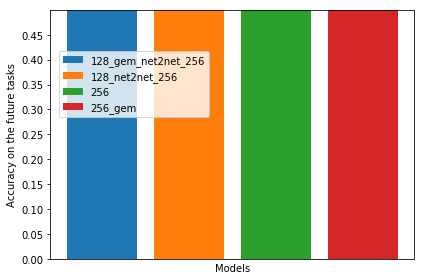

In [32]:
generate_future_accuracy_plots(task="cpu/copy")

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx11
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fcopy%2F256_gem&tag=eval_average_accuracy_model_for_curriculum_idx10
sum_256_gem_cpu_copy_previous_accuracy
[0.6120472345498864, 0.5833581671937527, 0.5698418300168117, 0.5970926216757468]
http://bigboss:9849/data/plugin/scalars/scalars?run=associative_recall%2F128_gem_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx6
http://bigboss:9849/data/plugin/scalars/scalars?run=associative_recall%2F128_net2net_256&tag=eval_average_accuracy_model_for_curriculum_idx12
http://bigboss:9849/data/plugin/scalars/scalars?run=associative_recall%2F

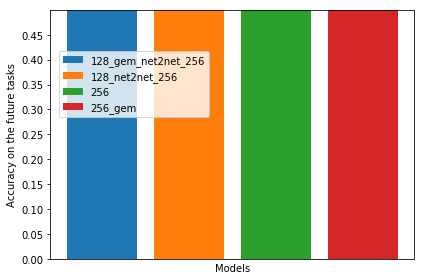

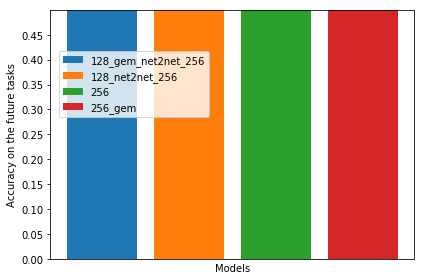

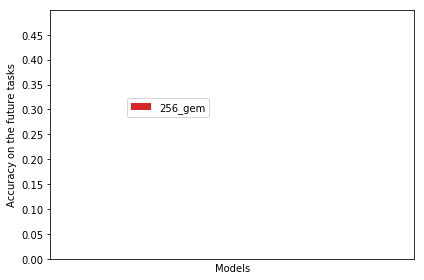

In [33]:
for task in task_names:
    generate_future_accuracy_plots(task)

In [34]:
tranfer_metric_name = "eval_average_accuracy_model_for_curriculum_idx"
# tranfer_metric_name = "eval_average_elementwise_accuracy_model_for_curriculum_idx"

In [35]:
# Vertically Stacked Histogram

model_names = ("128_net2net", )
task = "cpu/ssmnist"
tranfer_metric_name = "eval_average_elementwise_accuracy_model_for_curriculum_idx"
current_task_performance = list(map(lambda x: x.value, 
                                    get_current_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]
previous_task_performance = list(map(lambda x: x, 
                                    get_previous_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]

future_task_performance = list(map(lambda x: x, 
                                    get_future_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]
current_task_performance
# previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
# future_task_performance = get_future_performance_for_all_models_all_levels(task)

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=train_running_average_accuracy_model_idx_14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13


[0.8110466003417969,
 0.8375425338745117,
 0.834589421749115,
 0.823148250579834,
 0.7770938873291016,
 0.7771453857421875,
 0.7635061740875244]

In [36]:
get_future_performance_for_all_models_all_levels(task)['128_net2net']

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13


{'1': 0.16287201849950683,
 '2': 0.20929451637408314,
 '3': 0.25737409852445126,
 '4': 0.2722535024086634,
 '5': 0.2958457799894469,
 '6': 0.30368282015507037,
 '7': 0.30886271844307583,
 '8': 0.3736045414751226,
 '9': 0.3873683989048004,
 '10': 0.40544388360447353,
 '11': 0.4750205874443054,
 '12': 0.51307213306427}

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=train_running_average_accuracy_model_idx_14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_accuracy_model_for_curriculum_idx13


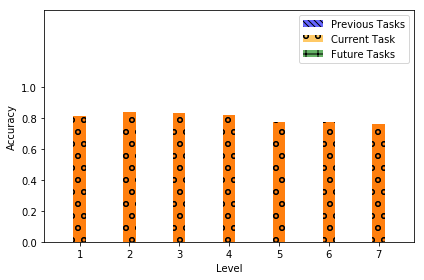

In [37]:
model_names = ("128_net2net", )
task = "cpu/ssmnist"
tranfer_metric_name = "eval_average_accuracy_model_for_curriculum_idx"
current_task_metric = "train_running_average_accuracy_model_idx_"
current_task_performance = list(map(lambda x: x.value, 
                                    get_current_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]
previous_task_performance = list(map(lambda x: x, 
                                    get_previous_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[1:7]
previous_task_performance.insert(0, 0.0)

future_task_performance = list(map(lambda x: x, 
                                    get_future_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]
current_task_performance
# previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
# future_task_performance = get_future_performance_for_all_models_all_levels(task)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


N = 7
ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, previous_task_performance, width, hatch=r"\\\\")
p2 = plt.bar(ind+width, current_task_performance, width, hatch="o")
p3 = plt.bar(ind+2*width, future_task_performance, width, hatch='+')

a_val = 0.6
# colors = ['#EA5739','#FEFFBE','#4BB05C']


circ1 = mpatches.Patch( facecolor="blue",alpha=a_val,hatch=r'\\\\',label='Previous Tasks')
circ2= mpatches.Patch( facecolor="orange",alpha=a_val,hatch='o',label='Current Task')
circ3 = mpatches.Patch(facecolor="green",alpha=a_val,hatch='+',label='Future Tasks')

plt.ylabel('Accuracy')
plt.xticks(ind+width, list(map(lambda x: str(x+1), ind)))
plt.ylim(0, 1.5)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.legend((circ1, circ2, circ3), ('Previous Tasks', 'Current Task', "Future Tasks"))
plt.xlabel("Level")
plt.tight_layout()
# plt.show()
plt.savefig("1.png")

plt.tight_layout()

http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=train_running_element_average_accuracy_model_idx_14
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13
http://bigboss:9849/data/plugin/scalars/scalars?run=cpu%2Fssmnist%2F128_net2net&tag=eval_average_elementwise_accuracy_model_for_curriculum_idx13


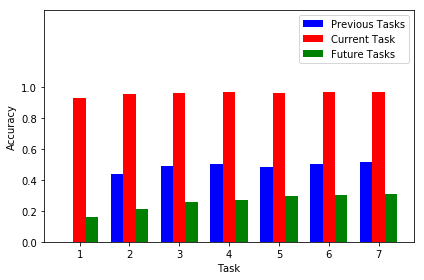

In [45]:
model_names = ("128_net2net", )
task = "cpu/ssmnist"
tranfer_metric_name = "eval_average_elementwise_accuracy_model_for_curriculum_idx"
current_task_metric = "train_running_element_average_accuracy_model_idx_"
current_task_performance = list(map(lambda x: x.value, 
                                    get_current_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]
previous_task_performance = list(map(lambda x: x, 
                                    get_previous_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[1:7]

previous_task_performance.insert(0, 0.0)

future_task_performance = list(map(lambda x: x, 
                                    get_future_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]
# previous_task_performance = get_previous_performance_for_all_models_all_levels(task)
# future_task_performance = get_future_performance_for_all_models_all_levels(task)
import numpy as np
import matplotlib.pyplot as plt


N = 7
ind = np.arange(N)    # the x locations for the groups
width = 0.25       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, previous_task_performance, width, hatch=r"\\\\")
# p2 = plt.bar(ind+width, current_task_performance, width, hatch="o")
# p3 = plt.bar(ind+2*width, future_task_performance, width, hatch='+')

p1 = plt.bar(ind, previous_task_performance, width, color="blue")
p2 = plt.bar(ind+width, current_task_performance, width, color = "red")
p3 = plt.bar(ind+2*width, future_task_performance, width, color = "green")


a_val = 1.0
# colors = ['#EA5739','#FEFFBE','#4BB05C']


circ1 = mpatches.Patch( facecolor="blue",alpha=a_val,label='Previous Tasks')
circ2= mpatches.Patch( facecolor="red",alpha=a_val,label='Current Task')
circ3 = mpatches.Patch(facecolor="green",alpha=a_val,label='Future Tasks')

plt.ylabel('Accuracy')
plt.xticks(ind+width, list(map(lambda x: str(x+1), ind)))
plt.ylim(0, 1.5)
plt.yticks(np.arange(0, 1.2, 0.2))
plt.legend((circ1, circ2, circ3), ('Previous Tasks', 'Current Task', "Future Tasks"))
plt.xlabel("Task")
plt.tight_layout()

# plt.show()
# plt.savefig("2.png")
plt.savefig('seq.pdf', format='pdf', dpi=1000)

In [ ]:
tranfer_metric_name = "eval_average_accuracy_model_for_curriculum_idx"
current_task_performance = list(map(lambda x: x.value, 
                                    get_current_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]

In [ ]:
current_task_performance

In [ ]:
tranfer_metric_name = "eval_average_elementwise_accuracy_model_for_curriculum_idx"
current_task_performance = list(map(lambda x: x.value, 
                                    get_current_performance_for_all_models_all_levels(task)['128_net2net']
                                    .values()))[:7]

In [ ]:
current_task_performance